### Data analysis of Justjoint.it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 900)

In [3]:
file_path = "data/data_just_join_it_all_data_08_2021.csv"
df = pd.read_csv(file_path)

In [139]:
print(df)

           Group Seniority                          Position   Location           Salary_b2b          Salary_permanent                 Obligatory_skills                   Optional_skills    technology_name technology_optional_name
2     Javascript    Senior  Senior Vue.js Frontend Developer   Warszawa  22 500 - 27 000 PLN  No permanent information            {'Vue.Js': 'Advanced'}       {'Reactjs': 'Nice To Have'}             Vue.Js                  Reactjs
2     Javascript    Senior  Senior Vue.js Frontend Developer   Warszawa  22 500 - 27 000 PLN  No permanent information            {'Vue.Js': 'Advanced'}            {'Go': 'Nice To Have'}             Vue.Js                       Go
2     Javascript    Senior  Senior Vue.js Frontend Developer   Warszawa  22 500 - 27 000 PLN  No permanent information            {'Vue.Js': 'Advanced'}         {'Agile': 'Nice To Have'}             Vue.Js                    Agile
2     Javascript    Senior  Senior Vue.js Frontend Developer   Warszawa  22 

In [4]:
print(df['Obligatory_skills'])

0       [{'Python': 'advanced'}, {'MS SQL': 'advanced'...
1       [{'TypeScript': 'master'}, {'React': 'master'}...
2       [{'Vue.js': 'advanced'}, {'JavaScript': 'advan...
3       [{'English': 'regular'}, {'TypeScript': 'regul...
4       [{'C#': 'advanced'}, {'Vue.js': 'advanced'}, {...
                              ...                        
5501    [{'English': 'advanced'}, {'CMS (Content Manag...
5502                           [{'Blockchain': 'junior'}]
5503    [{'ETL': 'junior'}, {'Microsoft SQL Server / S...
5504    [{'SQL': 'regular'}, {'R': 'junior'}, {'Matlab...
5505                           [{'Blockchain': 'junior'}]
Name: Obligatory_skills, Length: 5506, dtype: object


In [5]:
df['Obligatory_skills'] = df['Obligatory_skills'].apply(lambda row: row[1:-1].title().split(','))

In [6]:
print(df['Obligatory_skills'])

0       [{'Python': 'Advanced'},  {'Ms Sql': 'Advanced...
1       [{'Typescript': 'Master'},  {'React': 'Master'...
2       [{'Vue.Js': 'Advanced'},  {'Javascript': 'Adva...
3       [{'English': 'Regular'},  {'Typescript': 'Regu...
4       [{'C#': 'Advanced'},  {'Vue.Js': 'Advanced'}, ...
                              ...                        
5501    [{'English': 'Advanced'},  {'Cms (Content Mana...
5502                           [{'Blockchain': 'Junior'}]
5503    [{'Etl': 'Junior'},  {'Microsoft Sql Server / ...
5504    [{'Sql': 'Regular'},  {'R': 'Junior'},  {'Matl...
5505                           [{'Blockchain': 'Junior'}]
Name: Obligatory_skills, Length: 5506, dtype: object


In [7]:
df = df.explode('Obligatory_skills')

In [8]:
print(df['Obligatory_skills'])

0                 {'Python': 'Advanced'}
0                 {'Ms Sql': 'Advanced'}
0           {'Azure Devops': 'Advanced'}
1               {'Typescript': 'Master'}
1                    {'React': 'Master'}
                      ...               
5503     {'Business Analysis': 'Junior'}
5504                  {'Sql': 'Regular'}
5504                     {'R': 'Junior'}
5504                {'Matlab': 'Junior'}
5505            {'Blockchain': 'Junior'}
Name: Obligatory_skills, Length: 26322, dtype: object


In [9]:
df = df.replace('', np.nan)
df = df.dropna(subset=['Obligatory_skills', 'Optional_skills'])

In [10]:
print(df['Obligatory_skills'])

2                                  {'Vue.Js': 'Advanced'}
2                              {'Javascript': 'Advanced'}
2                                      {'Css': 'Regular'}
2                                     {'Html': 'Regular'}
3                                  {'English': 'Regular'}
                              ...                        
5502                             {'Blockchain': 'Junior'}
5503                                    {'Etl': 'Junior'}
5503     {'Microsoft Sql Server / Sql / Relational Dat...
5503                      {'Business Analysis': 'Junior'}
5505                             {'Blockchain': 'Junior'}
Name: Obligatory_skills, Length: 9646, dtype: object


In [11]:
df['technology_name'] = df['Obligatory_skills'].str.extract(
    "{\'(.*)\':")

In [12]:
print(df['Obligatory_skills'])

2                                  {'Vue.Js': 'Advanced'}
2                              {'Javascript': 'Advanced'}
2                                      {'Css': 'Regular'}
2                                     {'Html': 'Regular'}
3                                  {'English': 'Regular'}
                              ...                        
5502                             {'Blockchain': 'Junior'}
5503                                    {'Etl': 'Junior'}
5503     {'Microsoft Sql Server / Sql / Relational Dat...
5503                      {'Business Analysis': 'Junior'}
5505                             {'Blockchain': 'Junior'}
Name: Obligatory_skills, Length: 9646, dtype: object


In [13]:
print(df['Optional_skills'])

2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
3                           [{'Node.js': 'nice to have'}]
                              ...                        
5502    [{'layer 2': 'nice to have'}, {'EVM': 'nice to...
5503    [{'Banking experience': 'nice to have'}, {'uc4...
5503    [{'Banking experience': 'nice to have'}, {'uc4...
5503    [{'Banking experience': 'nice to have'}, {'uc4...
5505    [{'layer 2': 'nice to have'}, {'EVM': 'nice to...
Name: Optional_skills, Length: 9646, dtype: object


In [14]:
print(df['technology_name'])

2                                                  Vue.Js
2                                              Javascript
2                                                     Css
2                                                    Html
3                                                 English
                              ...                        
5502                                           Blockchain
5503                                                  Etl
5503    Microsoft Sql Server / Sql / Relational Databases
5503                                    Business Analysis
5505                                           Blockchain
Name: technology_name, Length: 9646, dtype: object


In [15]:
df['Optional_skills'] = df['Optional_skills'].apply(lambda row: row[1:-1].title().split(','))

In [16]:
df = df.explode('Optional_skills')

In [17]:
print(df['Optional_skills'])

2            {'Reactjs': 'Nice To Have'}
2                 {'Go': 'Nice To Have'}
2              {'Agile': 'Nice To Have'}
2        {'Open Source': 'Nice To Have'}
2            {'Reactjs': 'Nice To Have'}
                      ...               
5503           {'Maven': 'Nice To Have'}
5503            {'Jira': 'Nice To Have'}
5505         {'Layer 2': 'Nice To Have'}
5505             {'Evm': 'Nice To Have'}
5505        {'Solidity': 'Nice To Have'}
Name: Optional_skills, Length: 21107, dtype: object


In [18]:
df['technology_optional_name'] = df['Optional_skills'].str.extract(
    "{\'(.*)\':")

In [19]:
print(df['technology_optional_name'])

2           Reactjs
2                Go
2             Agile
2       Open Source
2           Reactjs
           ...     
5503          Maven
5503           Jira
5505        Layer 2
5505            Evm
5505       Solidity
Name: technology_optional_name, Length: 21107, dtype: object


In [20]:
len(df['technology_name'] == 'Python')

21107

In [21]:
df['technology_name'].sort_values().agg(['count', 'size', 'nunique'])

count      21097
size       21107
nunique     1210
Name: technology_name, dtype: int64

In [22]:
df.groupby('technology_name').agg(['count', 'size', 'nunique']).stack()

Group  Seniority  Position  Location  Salary_b2b  Salary_permanent  Obligatory_skills  Optional_skills  technology_optional_name
technology_name                                                                                                                                           
.Net             count      156        156       156       156         156               156                156              156                       156
                 size       156        156       156       156         156               156                156              156                       156
                 nunique      8          3        42        15          37                 6                  7               89                        74
.Net 4.5         count        2          2         2         2           2                 2                  2                2                         2
                 size         2          2         2         2           2                 2                  2                2                         2
...                         ...        ...       ...       ...         ...               ...                ...              ...                       ...
• Symfony        size         5          5         5         5           5                 5                  5                5                         5
                 nunique      1          1         1         1           1                 1                  1                5                         5
• Zend Framework count        5          5         5         5           5                 5                  5                5                         5
                 size         5          5         5         5           5                 5                  5                5                         5
                 nunique      1          1         1         1           1                 1                  1                5                         5

[3630 rows x 9 columns]

In [44]:
df_obligatory_skills = df.groupby('technology_name').count().reset_index().sort_values('Obligatory_skills',ascending=False).reset_index()[['technology_name', 'Obligatory_skills']]

In [45]:
df_obligatory_skills.head(15)

,technology_name,Obligatory_skills
0,Git,903
1,Javascript,886
2,Sql,749
3,English,654
4,Java,640
5,Python,544
6,Docker,457
7,Linux,388
8,Typescript,375
9,Php,342


In [57]:
df_obligatory_skills_top_20 = df_obligatory_skills.head(20)

   technology_name  Obligatory_skills
0              Git                903
1       Javascript                886
2              Sql                749
3          English                654
4             Java                640
5           Python                544
6           Docker                457
7            Linux                388
8       Typescript                375
9              Php                342
10           Mysql                297
11           React                282
12             Css                281
13        Rest Api                265
14             Aws                247
15            Html                243
16          Spring                240
17         Node.Js                235
18            Rest                228
19      Postgresql                227


<AxesSubplot:title={'center':'Most wanded obligatory skills'}, xlabel='technology_name'>

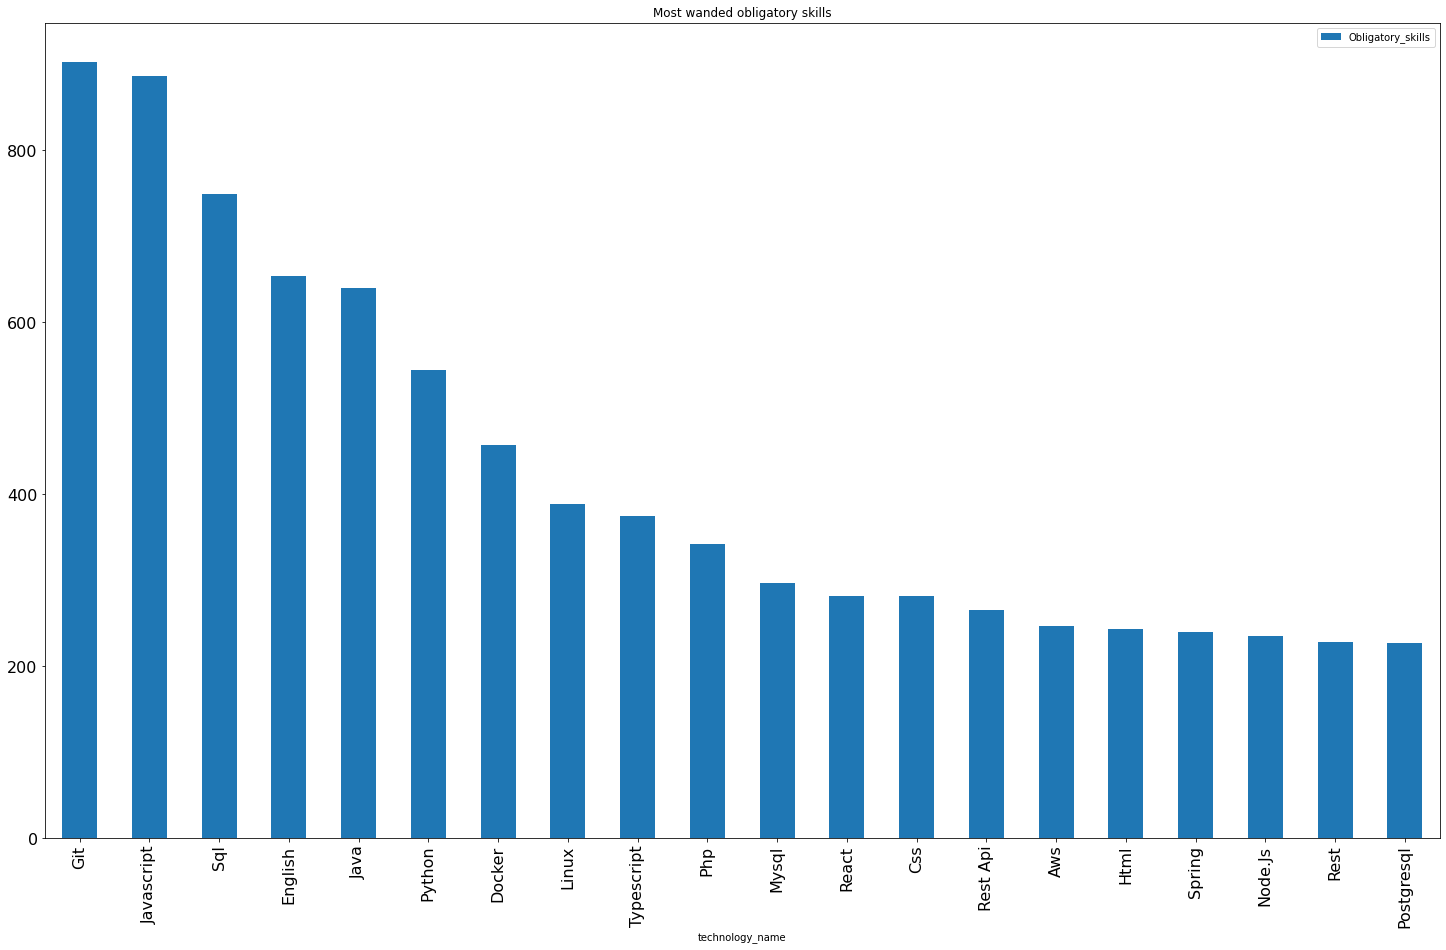

In [77]:
df_obligatory_skills_top_20.plot(x='technology_name', y='Obligatory_skills', kind='bar', fontsize=16, figsize=(25,15), title='Most wanded obligatory skills')

In [27]:
df_optional_skills = df.groupby('technology_optional_name').count().reset_index().sort_values('Optional_skills',ascending=False).reset_index()[['technology_optional_name', 'Optional_skills']]

In [28]:
df_optional_skills.head(10)

,technology_optional_name,Optional_skills
0,Aws,756
1,Docker,728
2,Kubernetes,474
3,Python,451
4,Javascript,393
5,React,376
6,Java,367
7,Node.Js,351
8,Azure,327
9,Angular,324


In [79]:
df_optional_skills_top_20 = df_optional_skills.head(20)

<AxesSubplot:title={'center':'Most wanded optional skills'}, xlabel='technology_optional_name'>

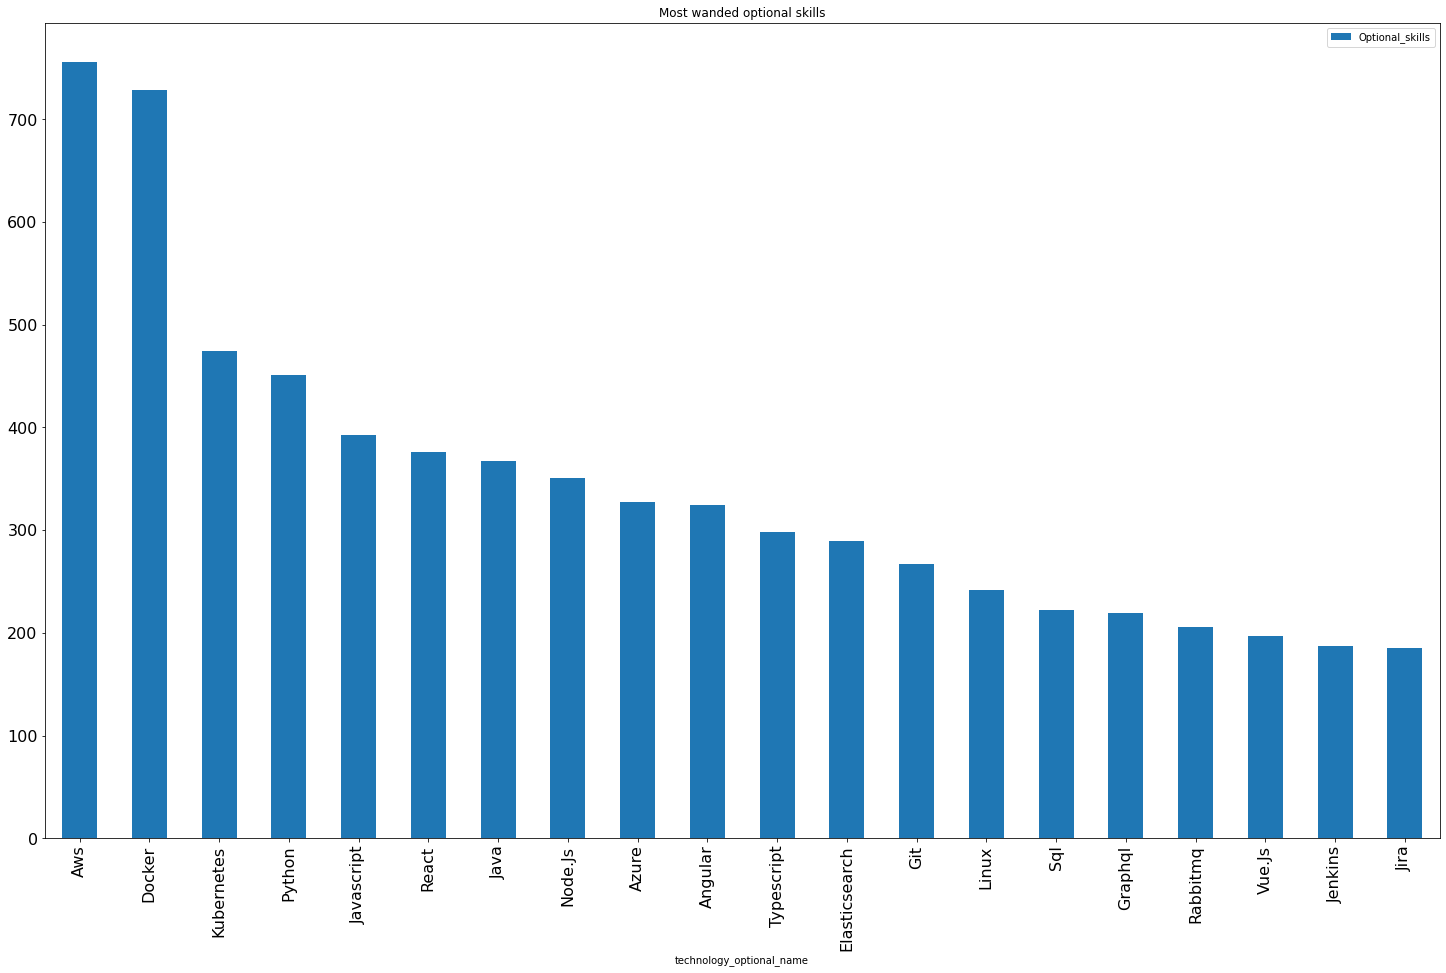

In [81]:
df_optional_skills_top_20.plot(x='technology_optional_name', y='Optional_skills', kind='bar', fontsize=16, figsize=(25,15), title='Most wanded optional skills')

In [29]:
df.groupby('technology_name').agg(['nunique'])

,Group,Seniority,Position,Location,Salary_b2b,Salary_permanent,Obligatory_skills,Optional_skills,technology_optional_name
,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique
technology_name,,,,,,,,,
.Net,8,3,42,15,37,6,7,89,74
.Net 4.5,1,1,1,1,1,1,1,2,2
.Net 5.0,1,1,1,1,1,1,1,4,4
.Net C#,4,3,20,5,17,4,6,49,44
.Net Core,4,3,37,12,36,10,6,65,57
...,...,...,...,...,...,...,...,...,...
• Node.Js,1,1,1,1,1,1,1,1,1
• Php7,1,1,1,1,1,1,1,5,5


In [86]:
df['Group']

2       Javascript
2       Javascript
2       Javascript
2       Javascript
2       Javascript
           ...    
5503         Other
5503         Other
5505         Other
5505         Other
5505         Other
Name: Group, Length: 21107, dtype: object

In [104]:
df_technology_group = df.groupby('Group').count().sort_values('Seniority',ascending=False)

<AxesSubplot:title={'center':'Technology Group'}, ylabel='Seniority'>

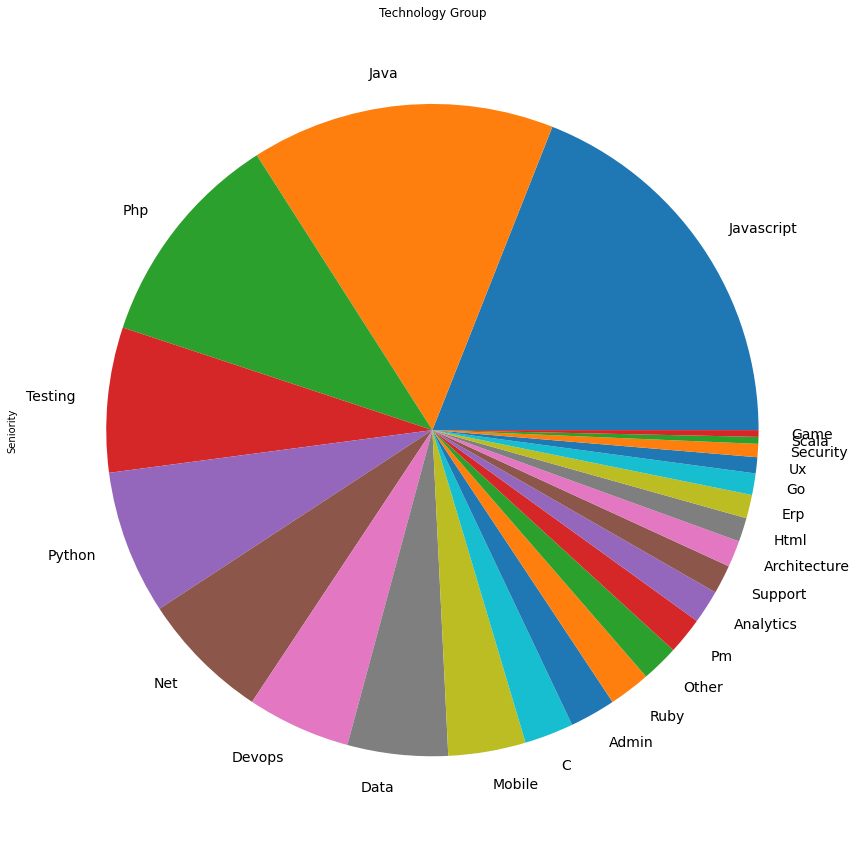

In [109]:
df_technology_group.plot(x='Group', y='Seniority', kind='pie', fontsize=14, figsize=(25,15), title='Technology Group', legend=False)

In [115]:
df['Seniority']

2       Senior
2       Senior
2       Senior
2       Senior
2       Senior
         ...  
5503    Junior
5503    Junior
5505    Junior
5505    Junior
5505    Junior
Name: Seniority, Length: 21107, dtype: object

In [124]:
df_seniority = df.groupby('Seniority').count().sort_values('Position',ascending=False).reset_index()[['Seniority', 'Position']]

In [125]:
print(df_seniority)

  Seniority  Position
0       Mid     11568
1    Senior      6794
2    Junior      2745


<AxesSubplot:title={'center':'Seniority'}, ylabel='Position'>

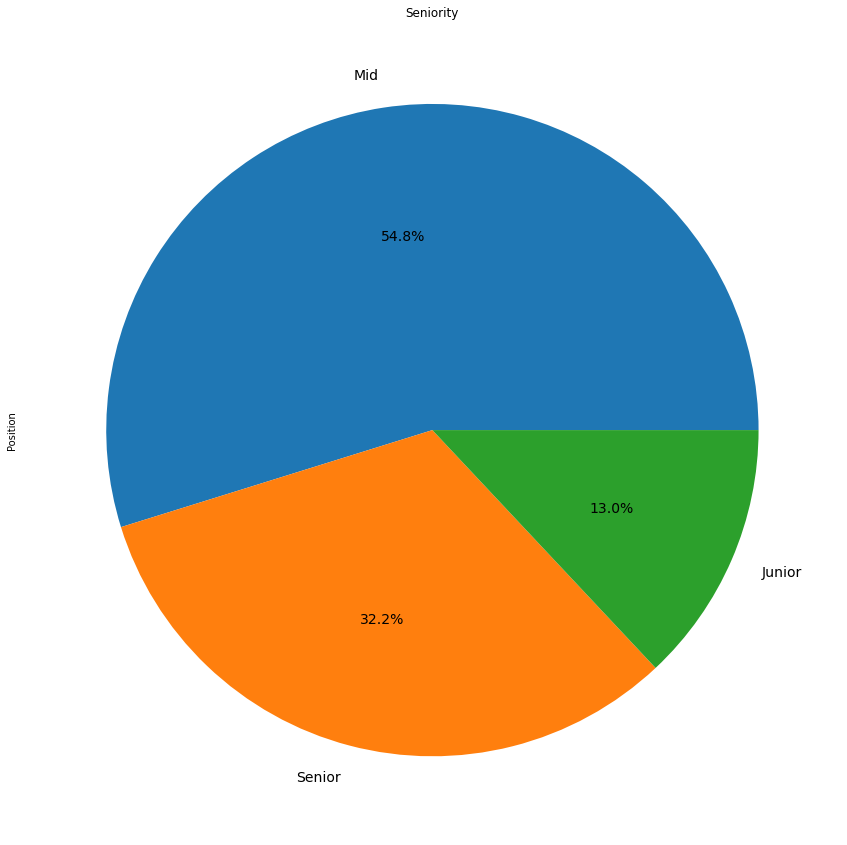

In [138]:
df_seniority.plot(x='Seniority', y='Position', kind='pie', fontsize=14, figsize=(25,15), title='Seniority', legend=False, labels=df_seniority['Seniority'].to_list(), autopct='%1.1f%%')